# Dependencies

In [1]:
from os import getcwd
from os.path import join

from IPython.display import HTML

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk

from sklearn import pipeline
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics
from sklearn import linear_model
from sklearn import gaussian_process
from sklearn import tree
from sklearn import neural_network
from sklearn import impute
from sklearn import ensemble

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.statespace.varmax import VARMAX

# File paths

In [2]:
cwd = getcwd()
data_dir = join(cwd, 'dataset')

dataset_base = join(data_dir, 'DATASET_BASE_1990.csv')
emissions_base_df = pd.read_csv(dataset_base)

ghg_file_path = join(data_dir, 'DATASET_GHG_EMISSIONS.csv')
co2_file_path = join(data_dir, 'DATASET_CO2_EMISSIONS.csv')
ch4_file_path = join(data_dir, 'DATASET_CH4_EMISSIONS.csv')
n2o_file_path = join(data_dir, 'DATASET_N2O_EMISSIONS.csv')

ghg_df = pd.read_csv(ghg_file_path)
co2_df = pd.read_csv(co2_file_path)
ch4_df = pd.read_csv(ch4_file_path)
n2o_df = pd.read_csv(n2o_file_path)

co2_df = co2_df.fillna(0)
ch4_df = ch4_df.fillna(0)
n2o_df = n2o_df.fillna(0)

# Pandas settings

In [3]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [4]:
HTML(emissions_base_df.to_html())

,Unnamed: 0,CO2,CH4,N2O,HFC-23,HFC-410A,HFC-43-10mee,HFC-125,HFC-134,HFC-134a,HFC-404A,HFC-407C,HFC-507a,HFC-152a,HFC-227ea,HFC-236fa,HFC-365mfc/227ea,HFC-365mfc,HFC-245fa,HFC-32,CF4,C2F6,C3F8,C4F6,c-C4F8,C5F8,NF3,SF6,EMISIONES NETAS Gg en CO2e,EMISIONES (sin 3B y 3D) Gg en CO2e,Unnamed: 30,Carbono negro (Gg)
0,[1] Energía,"352,617.358","27,077.324","3,305.396",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"383,000.078",NaN,NaN,NaN
1,[1A] Actividades de quema del combustible,"332,949.063","3,100.750","3,272.178",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"339,321.990",NaN,NaN,NaN
2,[1A1] Industrias de la energía,"138,687.864",142.293,293.389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"139,123.547",NaN,NaN,NaN
3,[1A1a] Actividad principal producción de electricidad y calor,"106,336.324",119.227,257.973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"106,713.524",NaN,NaN,NaN
4,[1A1b] Refinación del petróleo,"11,587.266",10.148,17.524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"11,614.938",NaN,NaN,1.817
5,[1A1c] Manufactura de combustibles sólidos y otras industrias de la energía,"20,764.274",12.918,17.892,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"20,795.084",NaN,NaN,0.233
6,[1A2] Industrias manufactura y de la construcción,"53,367.609",82.516,116.681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"53,566.807",NaN,NaN,1.616
7,[1A2a] Hierro y acero,"4,773.225",3.321,4.901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"4,781.447",NaN,NaN,0.099
8,[1A2b] Metales no ferrosos,"2,960.868",1.909,2.635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"2,965.412",NaN,NaN,0.032
9,[1A2c] Sustancias químicas,"16,468.899",10.420,14.130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"16,493.448",NaN,NaN,0.234


In [5]:
emissions_base_df['CO2']

0       352,617.358
1       332,949.063
2       138,687.864
3       106,336.324
4        11,587.266
5        20,764.274
6        53,367.609
7         4,773.225
8         2,960.868
9        16,468.899
10        2,689.561
11        4,347.932
12              NaN
13          442.157
14              NaN
15        7,894.815
16              NaN
17          408.037
18              NaN
19       13,382.115
20      110,279.032
21        5,498.660
22       99,489.794
23        1,593.101
24        3,697.477
25              NaN
26       30,614.557
27        4,357.440
28       19,905.333
29        6,351.784
30       19,668.295
31           90.758
32           90.758
33           86.434
34            4.324
35              NaN
36       19,577.537
37       17,359.133
38        5,988.392
39       11,321.654
40           49.087
41        2,218.404
42        2,000.269
43          215.328
44            2.807
45       44,482.928
46       23,747.326
47       13,670.975
48        2,383.157
49          445.214


In [6]:
ghg_df.dtypes

Year      int64
CO2     float64
CH4     float64
N2O     float64
dtype: object

In [7]:
ghg_df

,Year,CO2,CH4,N2O
0,1990,319999.8455,117840.4201,28337.97300
1,1991,329716.3529,119392.8666,27177.03342
2,1992,333049.7117,117998.4615,27988.13134
3,1993,338075.1071,118275.3551,26219.01096
4,1994,360853.3477,124026.1810,28335.69607
5,1995,347496.6454,127038.4565,28258.99299
6,1996,359553.2713,131254.5972,27629.11144
7,1997,375317.2362,138365.1189,29935.23041
8,1998,393944.4869,143331.7863,30056.78095
9,1999,386967.0070,136486.7789,31511.02751


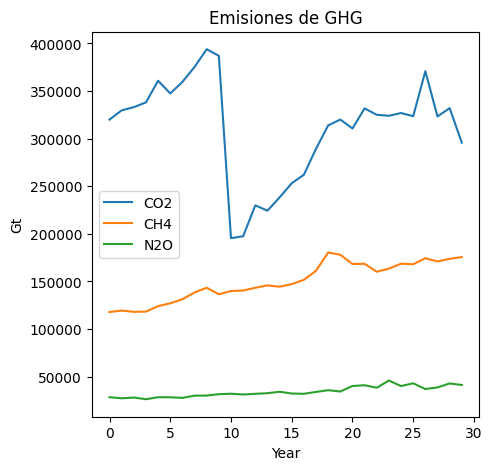

In [8]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(ghg_df['CO2'], label="CO2")
ax.plot(ghg_df['CH4'], label="CH4")
ax.plot(ghg_df['N2O'], label="N2O")
ax.set_xlabel('Year')
ax.set_ylabel('Gt')
ax.set_title('Emisiones de GHG')
ax.legend()

In [9]:
dfs = [co2_df, ch4_df, n2o_df]

In [10]:
co2_df["[2B9] Producción fluoroquímica"] = dfs[0]["[2B9] Producción fluoroquímica"].fillna(0)
co2_df["[2B9] Producción fluoroquímica"].dtype == 'O'

True

In [11]:
for df in dfs:
    for col in df.columns:
        if df[col].dtype == 'O':
            df[col] = df[col].replace(' ', 0);
        if df[col].mean() < 1:
            df.drop(columns=col)
        else:
            print(f"Passed {col}")

Passed Year
Passed [1] Energía
Passed [1A] Actividades de quema del combustible
Passed [1A1] Industrias de la energía
Passed [1A1a] Actividad principal producción de electricidad y calor
Passed [1A1b] Refinación del petróleo
Passed [1A1c] Manufactura de combustibles sólidos y otras industrias de la energía
Passed [1A2] Industrias manufactura y de la construcción
Passed [1A2a] Hierro y acero
Passed [1A2b] Metales no ferrosos
Passed [1A2c] Sustancias químicas
Passed [1A2d] Pulpa, papel e imprenta
Passed [1A2e] Procesamiento de alimentos, bebidas y tabaco
Passed [1A2g] Equipo de transporte
Passed [1A2i] Minería (con excepción de combustibles) y cantería
Passed [1A2k] Construcción
Passed [1A2m] Industria no especificada
Passed [1A3] Transporte
Passed [1A3a] Aviación civil
Passed [1A3b] Autotransporte
Passed [1A3c] Ferrocarriles
Passed [1A3d] Navegación marítima y fluvial
Passed [1A4] Otros sectores
Passed [1A4a] Comercial/institucional
Passed [1A4b] Residencial
Passed [1A4c] Agropecuario/s

In [12]:
HTML(co2_df.to_html())

,Year,[1] Energía,[1A] Actividades de quema del combustible,[1A1] Industrias de la energía,[1A1a] Actividad principal producción de electricidad y calor,[1A1b] Refinación del petróleo,[1A1c] Manufactura de combustibles sólidos y otras industrias de la energía,[1A2] Industrias manufactura y de la construcción,[1A2a] Hierro y acero,[1A2b] Metales no ferrosos,[1A2c] Sustancias químicas,"[1A2d] Pulpa, papel e imprenta","[1A2e] Procesamiento de alimentos, bebidas y tabaco",[1A2f] Minerales no metálicos,[1A2g] Equipo de transporte,[1A2h] Maquinaria,[1A2i] Minería (con excepción de combustibles) y cantería,[1A2j] Madera y productos de la madera,[1A2k] Construcción,[1A2l] Textiles y cueros,[1A2m] Industria no especificada,[1A3] Transporte,[1A3a] Aviación civil,[1A3b] Autotransporte,[1A3c] Ferrocarriles,[1A3d] Navegación marítima y fluvial,[1A3e] Otro transporte,[1A4] Otros sectores,[1A4a] Comercial/institucional,[1A4b] Residencial,[1A4c] Agropecuario/silvicultura/pesca/piscifactorías,[1B] Emisiones fugitivas provenientes de la fabricación de combustibles,[1B1] Combustibles sólidos,[1B1a] Minería carbonífera y manejo del carbón,[1B1ai] Minas subterráneas,[1B1aii] Minas superficie,[1B1b] Combustión espontánea y vertederos para quema de carbón,[1B2] Petróleo y gas natural,[1B2a] Petróleo,1B2ai Venteo petróleo,1B2aii Quemado petróleo,1B2aiii Otras fugitivas petróleo,[1B2b] Gas natural,1B2bi Venteo gas natural,1B2bii Quemado gas natural,1B2biii Otras fugitivas gas natural,[2] Procesos industriales y uso de productos,[2A] Industria de los minerales,[2A1] Producción de cemento,[2A2] Producción de cal,[2A3] Producción de vidrio,[2A4] Otros usos de carbonatos,[2A5] Otros,[2B] Industria química,[2B1] Producción de amoniaco,[2B2] Producción de ácido nítrico,[2B3] Producción de ácido adípico,"[2B4] Producción de caprolactama, glioxil y ácido glioxílico",[2B5] Producción de carburo,[2B6] Producción de dióxido de titanio,[2B7] Producción de ceniza de sosa,[2B8] Producción petroquímica y negro de humo,[2B9] Producción fluoroquímica,[2B10] Otros,[2C] Industria de los metales,[2C1] Producción de hierro y acero,[2C2] Producción de ferroaleaciones,[2C3] Producción de aluminio,[2C4] Producción de magnesio,[2C5] Producción de plomo,[2C6] Producción de zinc,[2C7] Otros,[2D] Uso de productos no energéticos de combustibles y de solvente,[2D1] Uso de lubricantes,[2D2] Uso de la cera de parafina,[2D3] Uso de solventes,[2D4] Otros,[2E] Industria electrónica,[2E1] Circuitos integrados o semiconductores,[2E2] Pantalla plana tipo TFT,[2E3] Células fotovoltaicas,[2E4] Fluido de transferencia térmica,[2E5] Otros,[2F] Uso de productos sustitutos de las sustancias que agotan la capa de ozono,[2F1] Refrigeración y aire acondicionado,[2F2] Agentes espumantes,[2F3] Protección contra incendios,[2F4] Aerosoles,[2F5] Solventes,[2F6] Otras aplicaciones,[2G] Manufactura y utilización de otros productos,[2G1] Equipos eléctricos,[2G2] SF6 y PFC de otros usos de productos,[2G3] N2O de usos de productos,[2G4] Otros,[2H] Otros,[2H1] Industria de la pulpa y el papel,[2H2] Industria de la alimentación y las bebidas,[2H3] Otros,"[3] Agricultura, silvicultura y otros usos de la tierra",[3A] Ganado,[3A1] Fermentación entérica,[3A1a] Bovino,[3A1b] Búfalos,[3A1c] Ovinos,[3A1d] Caprino,[3A1e] Camello,[3A1f] Caballos,[3A1g] Mulas y asnos,[3A1h] Porcinos,[3A1i] Otros (especificar),[3A2] Gestión del estiércol,[3A2a] Bovinos,[3A2b] Búfalos,[3A2c] Ovinos,[3A2d] Caprino,[3A2e] Camello,[3A2f] Caballos,[3A2g] Mulas y asnos,[3A2h] Porcinos,[3A2i] Aves de corral,[3A2g] Otros (especificar),[3B] Tierra,[3B1] Tierra forestales,[3B1a] Tierras forestales que permanecen como tal,[3B1b] Tierras convertidas a tierras forestales,[3B2] Tierra de cultivo,[3B2a] Tierras de cultivo que permanecen como tal,[3B2b] Tierras convertidas a tierras de cultivo,[3B3] Praderas,[3B3a] Praderas que permanecen como tal,[3B3b] Tierras convertidas en praderas,[3B4] Humedales,[3B4a] Humedales que permanecen como tal,[3B4b] Tie

In [13]:
co2_df.columns, len(co2_df.columns), co2_df.index

(Index(['Year', '[1] Energía', '[1A] Actividades de quema del combustible',
        '[1A1] Industrias de la energía',
        '[1A1a] Actividad principal producción de electricidad y calor',
        '[1A1b] Refinación del petróleo',
        '[1A1c] Manufactura de combustibles sólidos y otras industrias de la energía',
        '[1A2] Industrias manufactura y de la construcción',
        '[1A2a] Hierro y acero', '[1A2b] Metales no ferrosos',
        ...
        '[4A3] Tiraderos a cielo abierto para eliminación de residuos',
        '[4B] Tratamiento biológico de los residuos sólidos',
        '[4C] Incineración y quema a cielo abierto  de residuos',
        '[4C1] Incineración de residuos peligrosos industriales y biológico infeccioso',
        '[4C2] Quema a cielo abierto de residuos sólidos',
        '[4D] Tratamiento y eliminación de aguas residuales',
        '[4D1] Tratamiento y eliminación de aguas residuales municipales',
        '[4D2] Tratamiento y eliminación de aguas residuale

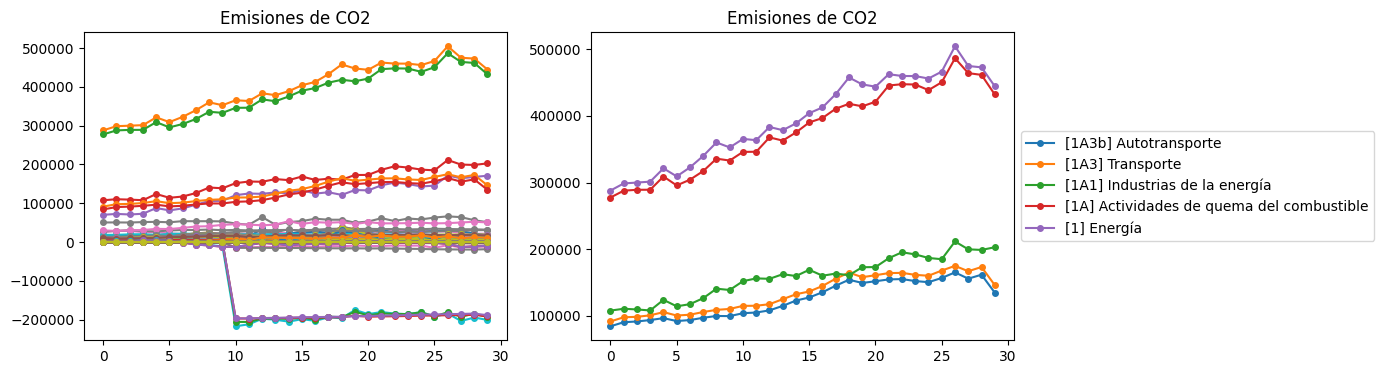

In [14]:
df = co2_df
cols = df.columns
col_arr = sorted([(col, df[col].sum()) for col in cols if col != 'Total'], key=lambda tup: tup[1])
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 4))

for col in cols:
    if col != "Total":
        ax0.plot(df[col], 'o', ls='-', ms=4)
        ax0.set_title(f'Emisiones de CO2')
        
for col in col_arr[-5:]:
    col = col[0]
    ax1.plot(df[col], 'o', ls='-', ms=4, label=col)
    ax1.set_title(f'Emisiones de CO2')
    ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

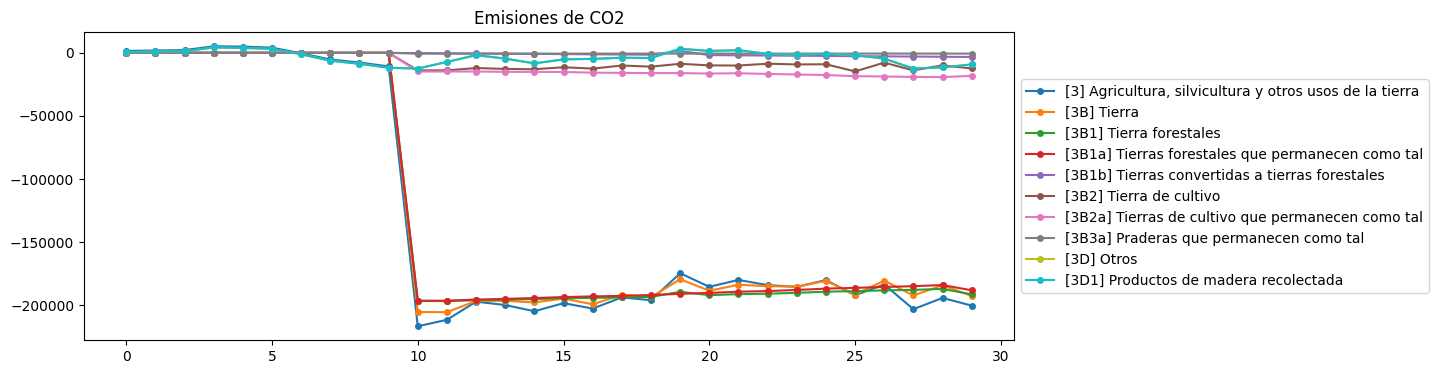

In [15]:
df = co2_df
cols = (df < 0).any()
cols = df.columns[cols]

fig, ax = plt.subplots(1, 1, figsize=(12, 4))

for col in cols:
    if col != "Total":
        ax.plot(df[col], 'o', ls='-', ms=4, label=col)
        ax.set_title(f'Emisiones de CO2')
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [16]:
HTML(ch4_df.to_html())

,Year,[1] Energía,[1A] Actividades de quema del combustible,[1A1] Industrias de la energía,[1A1a] Actividad principal producción de electricidad y calor,[1A1b] Refinación del petróleo,[1A1c] Manufactura de combustibles sólidos y otras industrias de la energía,[1A2] Industrias manufactura y de la construcción,[1A2a] Hierro y acero,[1A2b] Metales no ferrosos,[1A2c] Sustancias químicas,"[1A2d] Pulpa, papel e imprenta","[1A2e] Procesamiento de alimentos, bebidas y tabaco",[1A2f] Minerales no metálicos,[1A2g] Equipo de transporte,[1A2h] Maquinaria,[1A2i] Minería (con excepción de combustibles) y cantería,[1A2j] Madera y productos de la madera,[1A2k] Construcción,[1A2l] Textiles y cueros,[1A2m] Industria no especificada,[1A3] Transporte,[1A3a] Aviación civil,[1A3b] Autotransporte,[1A3c] Ferrocarriles,[1A3d] Navegación marítima y fluvial,[1A3e] Otro transporte,[1A4] Otros sectores,[1A4a] Comercial/institucional,[1A4b] Residencial,[1A4c] Agropecuario/silvicultura/pesca/piscifactorías,[1B] Emisiones fugitivas provenientes de la fabricación de combustibles,[1B1] Combustibles sólidos,[1B1a] Minería carbonífera y manejo del carbón,[1B1ai] Minas subterráneas,[1B1aii] Minas superficie,[1B1b] Combustión espontánea y vertederos para quema de carbón,[1B2] Petróleo y gas natural,[1B2a] Petróleo,1B2ai Venteo petróleo,1B2aii Quemado petróleo,1B2aiii Otras fugitivas petróleo,[1B2b] Gas natural,1B2bi Venteo gas natural,1B2bii Quemado gas natural,1B2biii Otras fugitivas gas natural,[2] Procesos industriales y uso de productos,[2A] Industria de los minerales,[2A1] Producción de cemento,[2A2] Producción de cal,[2A3] Producción de vidrio,[2A4] Otros usos de carbonatos,[2A5] Otros,[2B] Industria química,[2B1] Producción de amoniaco,[2B2] Producción de ácido nítrico,[2B3] Producción de ácido adípico,"[2B4] Producción de caprolactama, glioxil y ácido glioxílico",[2B5] Producción de carburo,[2B6] Producción de dióxido de titanio,[2B7] Producción de ceniza de sosa,[2B8] Producción petroquímica y negro de humo,[2B9] Producción fluoroquímica,[2B10] Otros,[2C] Industria de los metales,[2C1] Producción de hierro y acero,[2C2] Producción de ferroaleaciones,[2C3] Producción de aluminio,[2C4] Producción de magnesio,[2C5] Producción de plomo,[2C6] Producción de zinc,[2C7] Otros,[2D] Uso de productos no energéticos de combustibles y de solvente,[2D1] Uso de lubricantes,[2D2] Uso de la cera de parafina,[2D3] Uso de solventes,[2D4] Otros,[2E] Industria electrónica,[2E1] Circuitos integrados o semiconductores,[2E2] Pantalla plana tipo TFT,[2E3] Células fotovoltaicas,[2E4] Fluido de transferencia térmica,[2E5] Otros,[2F] Uso de productos sustitutos de las sustancias que agotan la capa de ozono,[2F1] Refrigeración y aire acondicionado,[2F2] Agentes espumantes,[2F3] Protección contra incendios,[2F4] Aerosoles,[2F5] Solventes,[2F6] Otras aplicaciones,[2G] Manufactura y utilización de otros productos,[2G1] Equipos eléctricos,[2G2] SF6 y PFC de otros usos de productos,[2G3] N2O de usos de productos,[2G4] Otros,[2H] Otros,[2H1] Industria de la pulpa y el papel,[2H2] Industria de la alimentación y las bebidas,[2H3] Otros,"[3] Agricultura, silvicultura y otros usos de la tierra",[3A] Ganado,[3A1] Fermentación entérica,[3A1a] Bovino,[3A1b] Búfalos,[3A1c] Ovinos,[3A1d] Caprino,[3A1e] Camello,[3A1f] Caballos,[3A1g] Mulas y asnos,[3A1h] Porcinos,[3A1i] Otros (especificar),[3A2] Gestión del estiércol,[3A2a] Bovinos,[3A2b] Búfalos,[3A2c] Ovinos,[3A2d] Caprino,[3A2e] Camello,[3A2f] Caballos,[3A2g] Mulas y asnos,[3A2h] Porcinos,[3A2i] Aves de corral,[3A2g] Otros (especificar),[3B] Tierra,[3B1] Tierra forestales,[3B1a] Tierras forestales que permanecen como tal,[3B1b] Tierras convertidas a tierras forestales,[3B2] Tierra de cultivo,[3B2a] Tierras de cultivo que permanecen como tal,[3B2b] Tierras convertidas a tierras de cultivo,[3B3] Praderas,[3B3a] Praderas que permanecen como tal,[3B3b] Tierras convertidas en praderas,[3B4] Humedales,[3B4a] Humedales que permanecen como tal,[3B4b] Tie

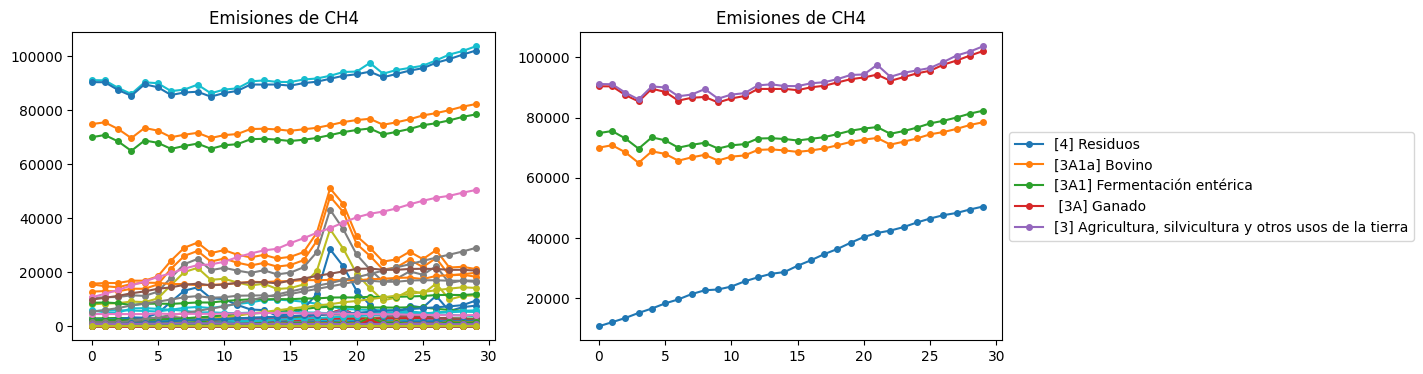

In [17]:
# df = ch4_df
# cols = df.columns
# fig, ax = plt.subplots(figsize=(6, 6))
# for col in df.columns:
#     if col != "Total":
#         ax.plot(df[col], 'o', ls='-', ms=4,)
#         ax.set_title(f'Emisiones de CH4')
df = ch4_df
cols = df.columns
col_arr = sorted([(col, df[col].sum()) for col in cols if col != 'Total'], key=lambda tup: tup[1])
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 4))

for col in cols:
    if col != "Total":
        ax0.plot(df[col], 'o', ls='-', ms=4)
        ax0.set_title(f'Emisiones de CH4')
        
for col in col_arr[-5:]:
    col = col[0]
    ax1.plot(df[col], 'o', ls='-', ms=4, label=col)
    ax1.set_title(f'Emisiones de CH4')
    ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [18]:
HTML(n2o_df.to_html())

,Year,[1] Energía,[1A] Actividades de quema del combustible,[1A1] Industrias de la energía,[1A1a] Actividad principal producción de electricidad y calor,[1A1b] Refinación del petróleo,[1A1c] Manufactura de combustibles sólidos y otras industrias de la energía,[1A2] Industrias manufactura y de la construcción,[1A2a] Hierro y acero,[1A2b] Metales no ferrosos,[1A2c] Sustancias químicas,"[1A2d] Pulpa, papel e imprenta","[1A2e] Procesamiento de alimentos, bebidas y tabaco",[1A2f] Minerales no metálicos,[1A2g] Equipo de transporte,[1A2h] Maquinaria,[1A2i] Minería (con excepción de combustibles) y cantería,[1A2j] Madera y productos de la madera,[1A2k] Construcción,[1A2l] Textiles y cueros,[1A2m] Industria no especificada,[1A3] Transporte,[1A3a] Aviación civil,[1A3b] Autotransporte,[1A3c] Ferrocarriles,[1A3d] Navegación marítima y fluvial,[1A3e] Otro transporte,[1A4] Otros sectores,[1A4a] Comercial/institucional,[1A4b] Residencial,[1A4c] Agropecuario/silvicultura/pesca/piscifactorías,[1B] Emisiones fugitivas provenientes de la fabricación de combustibles,[1B1] Combustibles sólidos,[1B1a] Minería carbonífera y manejo del carbón,[1B1ai] Minas subterráneas,[1B1aii] Minas superficie,[1B1b] Combustión espontánea y vertederos para quema de carbón,[1B2] Petróleo y gas natural,[1B2a] Petróleo,1B2ai Venteo petróleo,1B2aii Quemado petróleo,1B2aiii Otras fugitivas petróleo,[1B2b] Gas natural,1B2bi Venteo gas natural,1B2bii Quemado gas natural,1B2biii Otras fugitivas gas natural,[2] Procesos industriales y uso de productos,[2A] Industria de los minerales,[2A1] Producción de cemento,[2A2] Producción de cal,[2A3] Producción de vidrio,[2A4] Otros usos de carbonatos,[2A5] Otros,[2B] Industria química,[2B1] Producción de amoniaco,[2B2] Producción de ácido nítrico,[2B3] Producción de ácido adípico,"[2B4] Producción de caprolactama, glioxil y ácido glioxílico",[2B5] Producción de carburo,[2B6] Producción de dióxido de titanio,[2B7] Producción de ceniza de sosa,[2B8] Producción petroquímica y negro de humo,[2B9] Producción fluoroquímica,[2B10] Otros,[2C] Industria de los metales,[2C1] Producción de hierro y acero,[2C2] Producción de ferroaleaciones,[2C3] Producción de aluminio,[2C4] Producción de magnesio,[2C5] Producción de plomo,[2C6] Producción de zinc,[2C7] Otros,[2D] Uso de productos no energéticos de combustibles y de solvente,[2D1] Uso de lubricantes,[2D2] Uso de la cera de parafina,[2D3] Uso de solventes,[2D4] Otros,[2E] Industria electrónica,[2E1] Circuitos integrados o semiconductores,[2E2] Pantalla plana tipo TFT,[2E3] Células fotovoltaicas,[2E4] Fluido de transferencia térmica,[2E5] Otros,[2F] Uso de productos sustitutos de las sustancias que agotan la capa de ozono,[2F1] Refrigeración y aire acondicionado,[2F2] Agentes espumantes,[2F3] Protección contra incendios,[2F4] Aerosoles,[2F5] Solventes,[2F6] Otras aplicaciones,[2G] Manufactura y utilización de otros productos,[2G1] Equipos eléctricos,[2G2] SF6 y PFC de otros usos de productos,[2G3] N2O de usos de productos,[2G4] Otros,[2H] Otros,[2H1] Industria de la pulpa y el papel,[2H2] Industria de la alimentación y las bebidas,[2H3] Otros,"[3] Agricultura, silvicultura y otros usos de la tierra",[3A] Ganado,[3A1] Fermentación entérica,[3A1a] Bovino,[3A1b] Búfalos,[3A1c] Ovinos,[3A1d] Caprino,[3A1e] Camello,[3A1f] Caballos,[3A1g] Mulas y asnos,[3A1h] Porcinos,[3A1i] Otros (especificar),[3A2] Gestión del estiércol,[3A2a] Bovinos,[3A2b] Búfalos,[3A2c] Ovinos,[3A2d] Caprino,[3A2e] Camello,[3A2f] Caballos,[3A2g] Mulas y asnos,[3A2h] Porcinos,[3A2i] Aves de corral,[3A2g] Otros (especificar),[3B] Tierra,[3B1] Tierra forestales,[3B1a] Tierras forestales que permanecen como tal,[3B1b] Tierras convertidas a tierras forestales,[3B2] Tierra de cultivo,[3B2a] Tierras de cultivo que permanecen como tal,[3B2b] Tierras convertidas a tierras de cultivo,[3B3] Praderas,[3B3a] Praderas que permanecen como tal,[3B3b] Tierras convertidas en praderas,[3B4] Humedales,[3B4a] Humedales que permanecen como tal,[3B4b] Tie

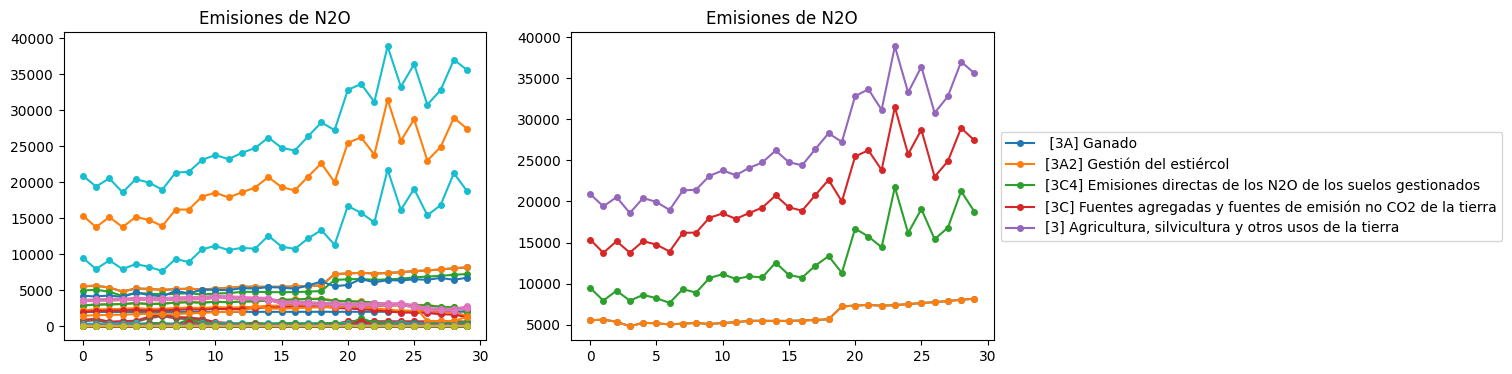

In [19]:
df = n2o_df
cols = df.columns
col_arr = sorted([(col, df[col].sum()) for col in cols if col != 'Total'], key=lambda tup: tup[1])
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 4))

for col in cols:
    if col != "Total":
        ax0.plot(df[col], 'o', ls='-', ms=4)
        ax0.set_title(f'Emisiones de N2O')
        
for col in col_arr[-5:]:
    col = col[0]
    ax1.plot(df[col], 'o', ls='-', ms=4, label=col)
    ax1.set_title(f'Emisiones de N2O')
    ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [20]:
co2_df_zeros = co2_df.copy()
co2_df_absolute = co2_df.copy()
ex = (co2_df < 0)
co2_df_zeros[ex] = 0
co2_df_absolute[ex] = co2_df_absolute[ex].abs()
co2_df.columns[ex.any() == True]

Index(['[3] Agricultura, silvicultura y otros usos de la tierra',
       '[3B] Tierra', '[3B1] Tierra forestales',
       '[3B1a] Tierras forestales que permanecen como tal',
       '[3B1b] Tierras convertidas a tierras forestales',
       '[3B2] Tierra de cultivo',
       '[3B2a] Tierras de cultivo que permanecen como tal',
       '[3B3a] Praderas que permanecen como tal', '[3D] Otros',
       '[3D1] Productos de madera recolectada'],
      dtype='object')

In [21]:
co2_df_zeros = co2_df_zeros.drop(columns='Total')
co2_df_zeros.loc[:, 'Total'] = co2_df_zeros[['[1] Energía', '[2] Procesos industriales y uso de productos', '[3] Agricultura, silvicultura y otros usos de la tierra', '[4] Residuos']].sum(axis=1)
HTML(co2_df_zeros.to_html())

,Year,[1] Energía,[1A] Actividades de quema del combustible,[1A1] Industrias de la energía,[1A1a] Actividad principal producción de electricidad y calor,[1A1b] Refinación del petróleo,[1A1c] Manufactura de combustibles sólidos y otras industrias de la energía,[1A2] Industrias manufactura y de la construcción,[1A2a] Hierro y acero,[1A2b] Metales no ferrosos,[1A2c] Sustancias químicas,"[1A2d] Pulpa, papel e imprenta","[1A2e] Procesamiento de alimentos, bebidas y tabaco",[1A2f] Minerales no metálicos,[1A2g] Equipo de transporte,[1A2h] Maquinaria,[1A2i] Minería (con excepción de combustibles) y cantería,[1A2j] Madera y productos de la madera,[1A2k] Construcción,[1A2l] Textiles y cueros,[1A2m] Industria no especificada,[1A3] Transporte,[1A3a] Aviación civil,[1A3b] Autotransporte,[1A3c] Ferrocarriles,[1A3d] Navegación marítima y fluvial,[1A3e] Otro transporte,[1A4] Otros sectores,[1A4a] Comercial/institucional,[1A4b] Residencial,[1A4c] Agropecuario/silvicultura/pesca/piscifactorías,[1B] Emisiones fugitivas provenientes de la fabricación de combustibles,[1B1] Combustibles sólidos,[1B1a] Minería carbonífera y manejo del carbón,[1B1ai] Minas subterráneas,[1B1aii] Minas superficie,[1B1b] Combustión espontánea y vertederos para quema de carbón,[1B2] Petróleo y gas natural,[1B2a] Petróleo,1B2ai Venteo petróleo,1B2aii Quemado petróleo,1B2aiii Otras fugitivas petróleo,[1B2b] Gas natural,1B2bi Venteo gas natural,1B2bii Quemado gas natural,1B2biii Otras fugitivas gas natural,[2] Procesos industriales y uso de productos,[2A] Industria de los minerales,[2A1] Producción de cemento,[2A2] Producción de cal,[2A3] Producción de vidrio,[2A4] Otros usos de carbonatos,[2A5] Otros,[2B] Industria química,[2B1] Producción de amoniaco,[2B2] Producción de ácido nítrico,[2B3] Producción de ácido adípico,"[2B4] Producción de caprolactama, glioxil y ácido glioxílico",[2B5] Producción de carburo,[2B6] Producción de dióxido de titanio,[2B7] Producción de ceniza de sosa,[2B8] Producción petroquímica y negro de humo,[2B9] Producción fluoroquímica,[2B10] Otros,[2C] Industria de los metales,[2C1] Producción de hierro y acero,[2C2] Producción de ferroaleaciones,[2C3] Producción de aluminio,[2C4] Producción de magnesio,[2C5] Producción de plomo,[2C6] Producción de zinc,[2C7] Otros,[2D] Uso de productos no energéticos de combustibles y de solvente,[2D1] Uso de lubricantes,[2D2] Uso de la cera de parafina,[2D3] Uso de solventes,[2D4] Otros,[2E] Industria electrónica,[2E1] Circuitos integrados o semiconductores,[2E2] Pantalla plana tipo TFT,[2E3] Células fotovoltaicas,[2E4] Fluido de transferencia térmica,[2E5] Otros,[2F] Uso de productos sustitutos de las sustancias que agotan la capa de ozono,[2F1] Refrigeración y aire acondicionado,[2F2] Agentes espumantes,[2F3] Protección contra incendios,[2F4] Aerosoles,[2F5] Solventes,[2F6] Otras aplicaciones,[2G] Manufactura y utilización de otros productos,[2G1] Equipos eléctricos,[2G2] SF6 y PFC de otros usos de productos,[2G3] N2O de usos de productos,[2G4] Otros,[2H] Otros,[2H1] Industria de la pulpa y el papel,[2H2] Industria de la alimentación y las bebidas,[2H3] Otros,"[3] Agricultura, silvicultura y otros usos de la tierra",[3A] Ganado,[3A1] Fermentación entérica,[3A1a] Bovino,[3A1b] Búfalos,[3A1c] Ovinos,[3A1d] Caprino,[3A1e] Camello,[3A1f] Caballos,[3A1g] Mulas y asnos,[3A1h] Porcinos,[3A1i] Otros (especificar),[3A2] Gestión del estiércol,[3A2a] Bovinos,[3A2b] Búfalos,[3A2c] Ovinos,[3A2d] Caprino,[3A2e] Camello,[3A2f] Caballos,[3A2g] Mulas y asnos,[3A2h] Porcinos,[3A2i] Aves de corral,[3A2g] Otros (especificar),[3B] Tierra,[3B1] Tierra forestales,[3B1a] Tierras forestales que permanecen como tal,[3B1b] Tierras convertidas a tierras forestales,[3B2] Tierra de cultivo,[3B2a] Tierras de cultivo que permanecen como tal,[3B2b] Tierras convertidas a tierras de cultivo,[3B3] Praderas,[3B3a] Praderas que permanecen como tal,[3B3b] Tierras convertidas en praderas,[3B4] Humedales,[3B4a] Humedales que permanecen como tal,[3B4b] Tie

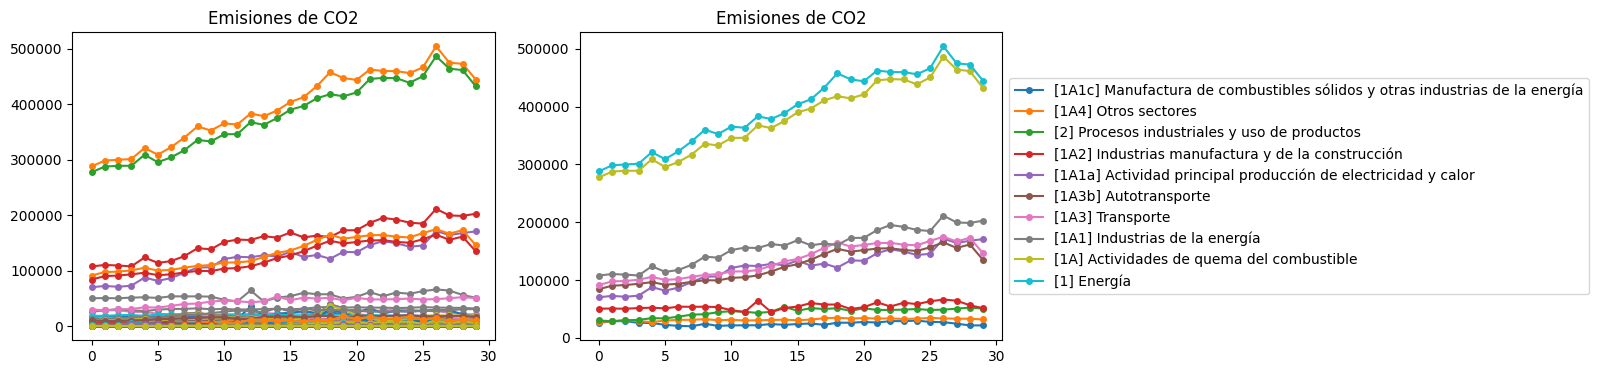

In [22]:
df = co2_df_zeros
cols = df.columns
col_arr = sorted([(col, df[col].sum()) for col in cols if col != 'Total'], key=lambda tup: tup[1])
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 4))

for col in cols:
    if col != "Total":
        ax0.plot(df[col], 'o', ls='-', ms=4)
        ax0.set_title(f'Emisiones de CO2')
        
for col in col_arr[-10:]:
    col = col[0]
    ax1.plot(df[col], 'o', ls='-', ms=4, label=col)
    ax1.set_title(f'Emisiones de CO2')
    ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [23]:
co2_df_absolute = co2_df_absolute.drop(columns='Total')
co2_df_absolute.loc[:, 'Total'] = co2_df_absolute[['[1] Energía', '[2] Procesos industriales y uso de productos', '[3] Agricultura, silvicultura y otros usos de la tierra', '[4] Residuos']].sum(axis=1)
HTML(co2_df_absolute.to_html())

,Year,[1] Energía,[1A] Actividades de quema del combustible,[1A1] Industrias de la energía,[1A1a] Actividad principal producción de electricidad y calor,[1A1b] Refinación del petróleo,[1A1c] Manufactura de combustibles sólidos y otras industrias de la energía,[1A2] Industrias manufactura y de la construcción,[1A2a] Hierro y acero,[1A2b] Metales no ferrosos,[1A2c] Sustancias químicas,"[1A2d] Pulpa, papel e imprenta","[1A2e] Procesamiento de alimentos, bebidas y tabaco",[1A2f] Minerales no metálicos,[1A2g] Equipo de transporte,[1A2h] Maquinaria,[1A2i] Minería (con excepción de combustibles) y cantería,[1A2j] Madera y productos de la madera,[1A2k] Construcción,[1A2l] Textiles y cueros,[1A2m] Industria no especificada,[1A3] Transporte,[1A3a] Aviación civil,[1A3b] Autotransporte,[1A3c] Ferrocarriles,[1A3d] Navegación marítima y fluvial,[1A3e] Otro transporte,[1A4] Otros sectores,[1A4a] Comercial/institucional,[1A4b] Residencial,[1A4c] Agropecuario/silvicultura/pesca/piscifactorías,[1B] Emisiones fugitivas provenientes de la fabricación de combustibles,[1B1] Combustibles sólidos,[1B1a] Minería carbonífera y manejo del carbón,[1B1ai] Minas subterráneas,[1B1aii] Minas superficie,[1B1b] Combustión espontánea y vertederos para quema de carbón,[1B2] Petróleo y gas natural,[1B2a] Petróleo,1B2ai Venteo petróleo,1B2aii Quemado petróleo,1B2aiii Otras fugitivas petróleo,[1B2b] Gas natural,1B2bi Venteo gas natural,1B2bii Quemado gas natural,1B2biii Otras fugitivas gas natural,[2] Procesos industriales y uso de productos,[2A] Industria de los minerales,[2A1] Producción de cemento,[2A2] Producción de cal,[2A3] Producción de vidrio,[2A4] Otros usos de carbonatos,[2A5] Otros,[2B] Industria química,[2B1] Producción de amoniaco,[2B2] Producción de ácido nítrico,[2B3] Producción de ácido adípico,"[2B4] Producción de caprolactama, glioxil y ácido glioxílico",[2B5] Producción de carburo,[2B6] Producción de dióxido de titanio,[2B7] Producción de ceniza de sosa,[2B8] Producción petroquímica y negro de humo,[2B9] Producción fluoroquímica,[2B10] Otros,[2C] Industria de los metales,[2C1] Producción de hierro y acero,[2C2] Producción de ferroaleaciones,[2C3] Producción de aluminio,[2C4] Producción de magnesio,[2C5] Producción de plomo,[2C6] Producción de zinc,[2C7] Otros,[2D] Uso de productos no energéticos de combustibles y de solvente,[2D1] Uso de lubricantes,[2D2] Uso de la cera de parafina,[2D3] Uso de solventes,[2D4] Otros,[2E] Industria electrónica,[2E1] Circuitos integrados o semiconductores,[2E2] Pantalla plana tipo TFT,[2E3] Células fotovoltaicas,[2E4] Fluido de transferencia térmica,[2E5] Otros,[2F] Uso de productos sustitutos de las sustancias que agotan la capa de ozono,[2F1] Refrigeración y aire acondicionado,[2F2] Agentes espumantes,[2F3] Protección contra incendios,[2F4] Aerosoles,[2F5] Solventes,[2F6] Otras aplicaciones,[2G] Manufactura y utilización de otros productos,[2G1] Equipos eléctricos,[2G2] SF6 y PFC de otros usos de productos,[2G3] N2O de usos de productos,[2G4] Otros,[2H] Otros,[2H1] Industria de la pulpa y el papel,[2H2] Industria de la alimentación y las bebidas,[2H3] Otros,"[3] Agricultura, silvicultura y otros usos de la tierra",[3A] Ganado,[3A1] Fermentación entérica,[3A1a] Bovino,[3A1b] Búfalos,[3A1c] Ovinos,[3A1d] Caprino,[3A1e] Camello,[3A1f] Caballos,[3A1g] Mulas y asnos,[3A1h] Porcinos,[3A1i] Otros (especificar),[3A2] Gestión del estiércol,[3A2a] Bovinos,[3A2b] Búfalos,[3A2c] Ovinos,[3A2d] Caprino,[3A2e] Camello,[3A2f] Caballos,[3A2g] Mulas y asnos,[3A2h] Porcinos,[3A2i] Aves de corral,[3A2g] Otros (especificar),[3B] Tierra,[3B1] Tierra forestales,[3B1a] Tierras forestales que permanecen como tal,[3B1b] Tierras convertidas a tierras forestales,[3B2] Tierra de cultivo,[3B2a] Tierras de cultivo que permanecen como tal,[3B2b] Tierras convertidas a tierras de cultivo,[3B3] Praderas,[3B3a] Praderas que permanecen como tal,[3B3b] Tierras convertidas en praderas,[3B4] Humedales,[3B4a] Humedales que permanecen como tal,[3B4b] Tie

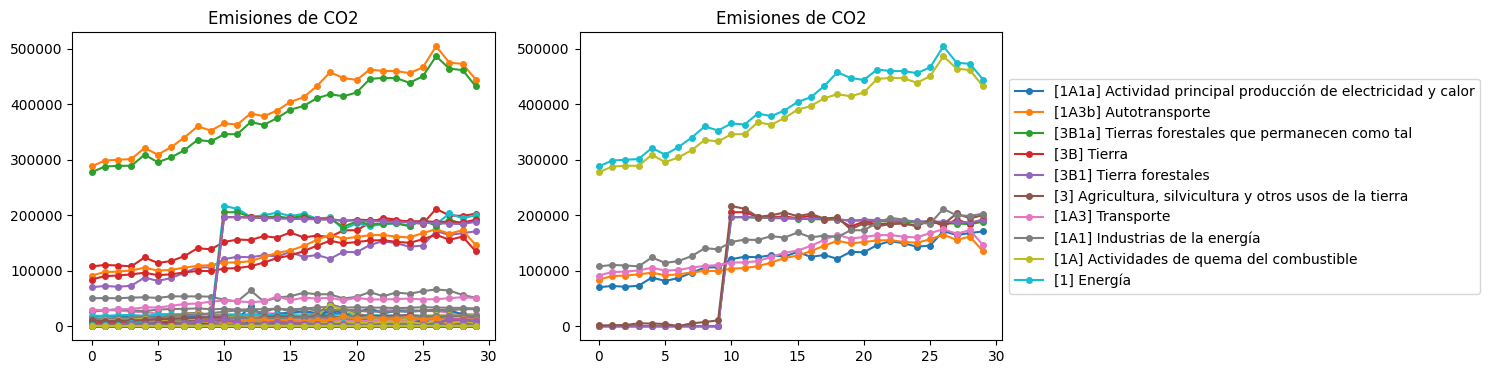

In [24]:
df = co2_df_absolute
cols = df.columns
col_arr = sorted([(col, df[col].sum()) for col in cols if col != 'Total'], key=lambda tup: tup[1])
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 4))

for col in cols:
    if col != "Total":
        ax0.plot(df[col], 'o', ls='-', ms=4)
        ax0.set_title(f'Emisiones de CO2')
        
for col in col_arr[-10:]:
    col = col[0]
    ax1.plot(df[col], 'o', ls='-', ms=4, label=col)
    ax1.set_title(f'Emisiones de CO2')
    ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [25]:
ghg_df = pd.DataFrame()
# ghg_df.loc[:, 'Año'] = pd.DataFrame(np.array([i for i in range(1990, 2020)]), columns=['Año'])
ghg_df.loc[:, 'Total_CO2'] = co2_df[['[1] Energía', '[2] Procesos industriales y uso de productos', '[3] Agricultura, silvicultura y otros usos de la tierra', '[4] Residuos']].sum(axis=1)
ghg_df.loc[:, 'Total_CH4'] = ch4_df[['[1] Energía', '[2] Procesos industriales y uso de productos', '[3] Agricultura, silvicultura y otros usos de la tierra', '[4] Residuos']].sum(axis=1)
ghg_df.loc[:, 'Total_N2O'] = n2o_df[['[1] Energía', '[2] Procesos industriales y uso de productos', '[3] Agricultura, silvicultura y otros usos de la tierra', '[4] Residuos']].sum(axis=1)
ghg_df.loc[:, 'Total_CO2_cero'] = co2_df_zeros['Total']
ghg_df.loc[:, 'Total_CO2_abs'] = co2_df_absolute['Total']

In [26]:
ghg_df

,Total_CO2,Total_CH4,Total_N2O,Total_CO2_cero,Total_CO2_abs
0,319999.845435,117840.420107,28337.973001,319999.845435,319999.845435
1,329716.352941,119392.866648,27177.033418,329716.352941,329716.352941
2,333049.711791,117998.461475,27988.131344,333049.711791,333049.711791
3,338075.107079,118275.355124,26219.010955,338075.107079,338075.107079
4,360853.347739,124026.181048,28335.696073,360853.347739,360853.347739
5,347496.645328,127038.456512,28258.992991,347496.645328,347496.645328
6,359553.271340,131254.597197,27629.111445,359916.255860,360279.240381
7,375317.236119,138365.118857,29935.230411,380543.586699,385769.937279
8,393944.486939,143331.786281,30056.780952,401618.538463,409292.589987
9,386967.007008,136486.778871,31511.027508,397644.952468,408322.897928


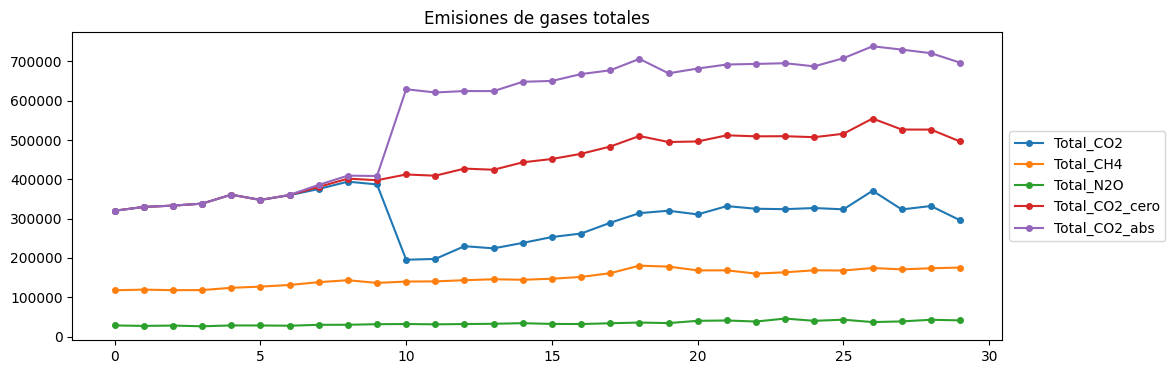

In [27]:
df = ghg_df
cols = df.columns
col_arr = sorted([(col, df[col].sum()) for col in cols if col != 'Total'], key=lambda tup: tup[1])
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

for col in cols:
    ax.plot(df[col], 'o', ls='-', ms=4, label=col)
    ax.set_title(f'Emisiones de gases totales')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [28]:
index = pd.date_range(start="1990", end="2020", freq="A-DEC")

scaler = preprocessing.Normalizer()
scaled = scaler.fit_transform(ghg_df)

ghg_df = pd.DataFrame(scaled, columns=['Total_CO2','Total_CH4','Total_N2O', 'Total_CO2_cero', 'Total_CO2_abs'])

ghg_total_co2_arr = ghg_df['Total_CO2'].to_numpy()
ghg_total_ch4_arr = ghg_df['Total_CH4'].to_numpy()
ghg_total_n2o_arr = ghg_df['Total_N2O'].to_numpy()
ghg_total_co2_zero_arr = ghg_df['Total_CO2_cero'].to_numpy()
ghg_total_co2_abs_arr = ghg_df['Total_CO2_abs'].to_numpy()



co2_ts = pd.Series(ghg_total_co2_arr, index)
ch4_ts = pd.Series(ghg_total_ch4_arr, index)
n2o_ts = pd.Series(ghg_total_n2o_arr, index)
co2_cero_ts = pd.Series(ghg_total_co2_zero_arr, index)
co2_abs_ts = pd.Series(ghg_total_co2_abs_arr, index)

HTML(ghg_df.to_html())

,Total_CO2,Total_CH4,Total_N2O,Total_CO2_cero,Total_CO2_abs
0,0.564023,0.207702,0.049948,0.564023,0.564023
1,0.564520,0.204417,0.046531,0.564520,0.564520
2,0.565000,0.200178,0.047480,0.565000,0.565000
3,0.565377,0.197797,0.043847,0.565377,0.565377
4,0.565749,0.194449,0.044425,0.565749,0.565749
5,0.564309,0.206301,0.045891,0.564309,0.564309
6,0.563863,0.205838,0.043329,0.564433,0.565002
7,0.556691,0.205231,0.044402,0.564443,0.572195
8,0.554106,0.201604,0.042277,0.564900,0.575694
9,0.550448,0.194148,0.044823,0.565637,0.580826


# Metricas

In [29]:
def plot_graphs(results: list, names: list, title: str) -> None:
    fig, ax = plt.subplots(1, 1, figsize=(16, 6))
    for result in results:
        ax.plot(result, marker="o")
    ax.set_title(title)
    ax.legend(names, loc='center left', bbox_to_anchor=(1, 0.5))

In [30]:
def time_series_eval_metrics(y_true, y_pred) -> float:
    mse = metrics.mean_squared_error(y_true, y_pred)
    return mse

In [31]:
scores = {"Models":[], "CO2": [], "CH4": [], "N2O": [], "CO2_zeroes": [], "CO2_absolutes": []}

In [32]:
scores_cols = ["CO2", "CH4", "N2O", "CO2_zeroes", "CO2_absolutes"]

In [33]:
co2_ts_train = co2_ts.iloc[:25]
co2_ts_test = co2_ts.iloc[25:]
ch4_ts_train = ch4_ts.iloc[:25]
ch4_ts_test = ch4_ts.iloc[25:]
n2o_ts_train = n2o_ts.iloc[:25]
n2o_ts_test = n2o_ts.iloc[25:]
co2_cero_ts_train = co2_cero_ts.iloc[:25]
co2_cero_ts_test = co2_cero_ts.iloc[25:]
co2_abs_ts_train = co2_abs_ts.iloc[:25]
co2_abs_ts_test = co2_abs_ts.iloc[25:]

# Correlacion

In [34]:
ghg_df.corr()

,Total_CO2,Total_CH4,Total_N2O,Total_CO2_cero,Total_CO2_abs
Total_CO2,1.000000,0.863982,0.599965,0.976429,-0.997778
Total_CH4,0.863982,1.000000,0.518913,0.792644,-0.877798
Total_N2O,0.599965,0.518913,1.000000,0.585650,-0.598685
Total_CO2_cero,0.976429,0.792644,0.585650,1.000000,-0.959878
Total_CO2_abs,-0.997778,-0.877798,-0.598685,-0.959878,1.000000


# Suavizado Exponencial Simple

In [35]:
titles = ['Simple Exponential Smoothing CO2', 'Simple Exponential Smoothing CH4', 'Simple Exponential Smoothing N2O', 'Simple Exponential Smoothing CO2 (zeroes)', 'Simple Exponential Smoothing CO2 (absolutes)']
datasets = [co2_ts_train, ch4_ts_train, n2o_ts_train, co2_cero_ts_train, co2_abs_ts_train]
testsets = [co2_ts_test, ch4_ts_test, n2o_ts_test, co2_cero_ts_test, co2_abs_ts_test]

for i in range(1, 10):
    scores["Models"].append(f"Simple Exponential Smoothing ({i/10})")
scores["Models"].append("Simple Exponential Smoothing Estimated")

for i in range(len(datasets)):
    title = titles[i]
    dataset = datasets[i]
    testset = testsets[i]
    col = scores_cols[i]
    
    results = [dataset]
    results_fc = []
    names = []
    
    for j in range(1, 10):
        fit = SimpleExpSmoothing(dataset, initialization_method='heuristic').fit(
            smoothing_level=(j/10), optimized=False
        )
        fit_vals = fit.fittedvalues
        results.append(fit_vals)
        fcast = fit.forecast(5)
        results_fc.append(fcast)
        names.append(f"alpha={j/10}$")
    fit = SimpleExpSmoothing(dataset, initialization_method='estimated').fit()
    fit_vals = fit.fittedvalues
    results.append(fit_vals)
    fcast = fit.forecast(5)
    results_fc.append(fcast)
    # names.append(fit.model.params["smoothing_level"])
    
    # plot_graphs(results, names, title)

    for result in results_fc:
        scores[col].append(time_series_eval_metrics(testset.values, result))

# Suavizado Exponencial Doble

In [36]:
titles = ['Double Exponential Smoothing CO2', 'Double Exponential Smoothing CH4', 'Double Exponential Smoothing N2O', 'Double Exponential Smoothing CO2 (zeroes)', 'Double Exponential Smoothing CO2 (absolutes)']
datasets = [co2_ts_train, ch4_ts_train, n2o_ts_train, co2_cero_ts_train, co2_abs_ts_train]
testsets = [co2_ts_test, ch4_ts_test, n2o_ts_test, co2_cero_ts_test, co2_abs_ts_test]

for i in range(1, 10):
    for j in range(1, 10):
        scores["Models"].append(f"Holt's linear trend ({i / 10}, {j / 10})")
        scores["Models"].append(f"Exponential trend ({i / 10}, {j / 10})")
        scores["Models"].append(f"Additive damped trend ({i / 10}, {j / 10})")

for i in range(len(datasets)):
    title = titles[i]
    dataset = datasets[i]
    testset = testsets[i]
    col = scores_cols[i]
    
    for i in range(1, 10):
        for j in range(1, 10):
    
            fit1 = Holt(dataset, initialization_method="estimated").fit(
                smoothing_level=(i/10), smoothing_trend=(j/10), optimized=False
            )
            fit2 = Holt(dataset, exponential=True, initialization_method="estimated").fit(
                smoothing_level=(i/10), smoothing_trend=(j/10), optimized=False
            )
            fit3 = Holt(dataset, damped_trend=True, initialization_method="estimated").fit(
                smoothing_level=(i/10), smoothing_trend=(j/10)
            )

            fit_vals1 = fit1.fittedvalues
            fit_vals2 = fit2.fittedvalues
            fit_vals3 = fit3.fittedvalues

            fcast1 = fit1.forecast(5)
            fcast2 = fit2.forecast(5)
            fcast3 = fit3.forecast(5)

            results = [dataset, fit_vals1, fit_vals2, fit_vals3]
            results_fc = [fcast1, fcast2, fcast3]
            # names = [r"Holt's linear trend", r"Exponential trend", r"Additive damped trend"]
            # plot_graphs(results, names, title)

            for result in results_fc:
                scores[col].append(time_series_eval_metrics(testset.values, result))

# Suavizado Exponencial Triple

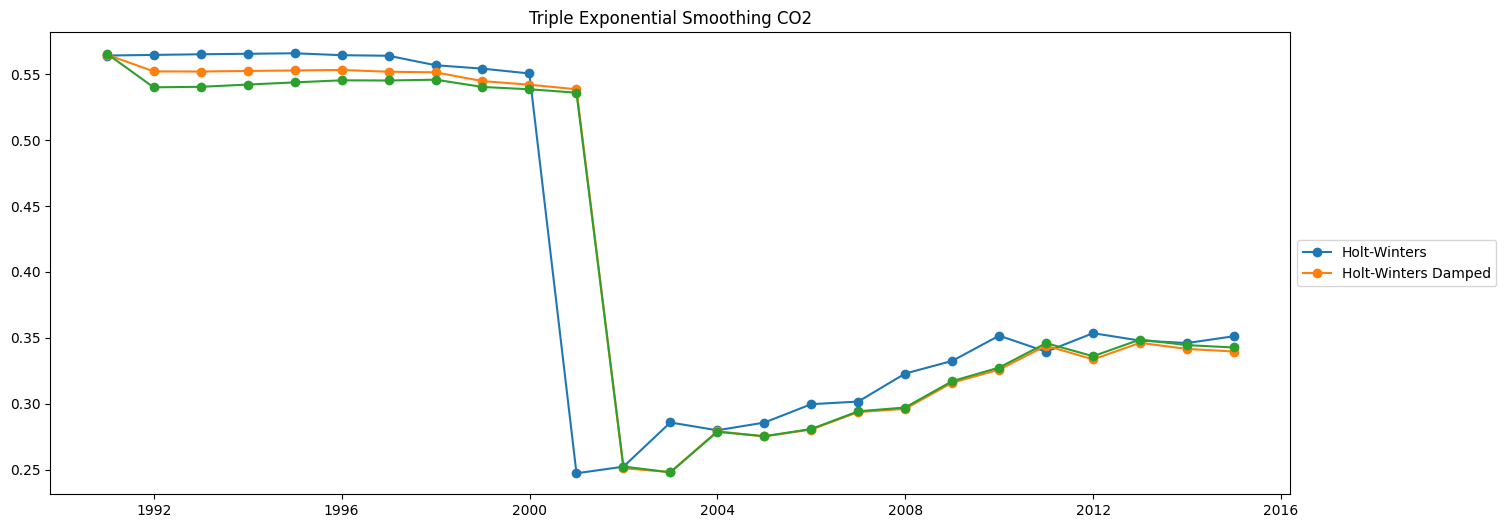

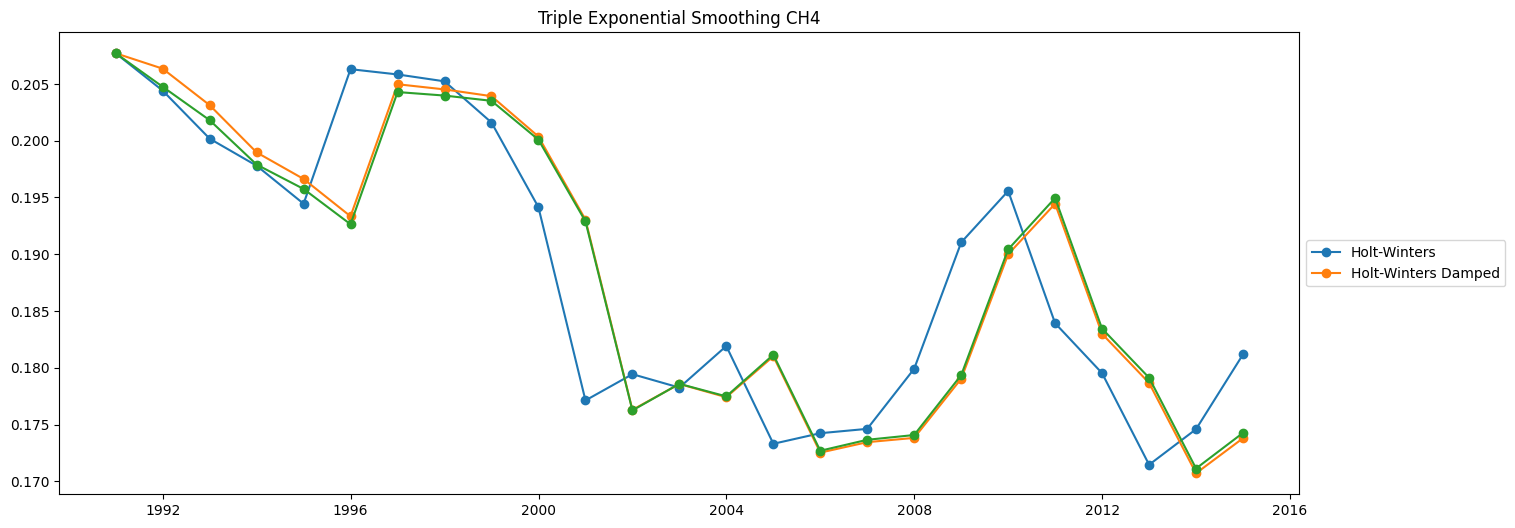

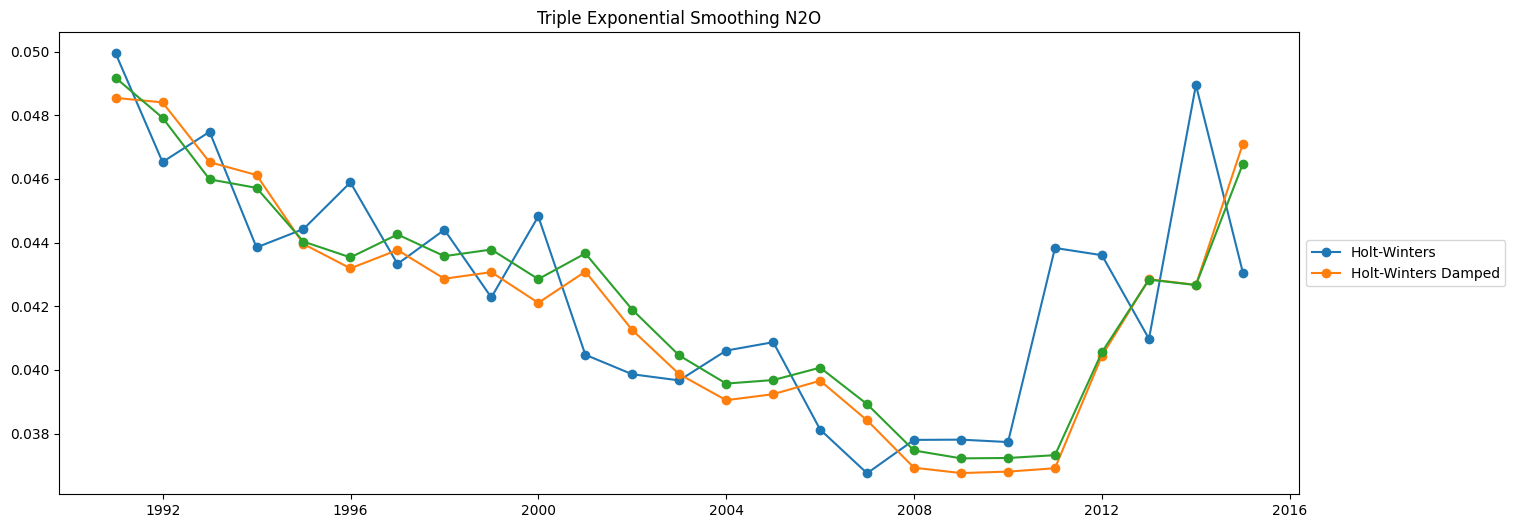

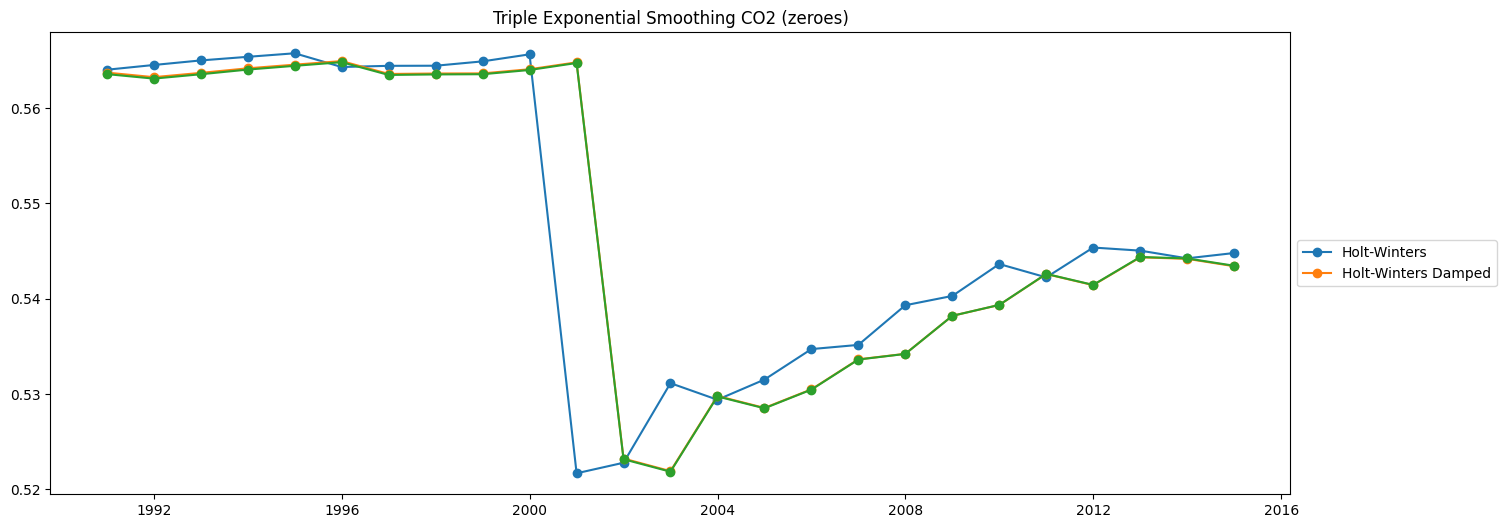

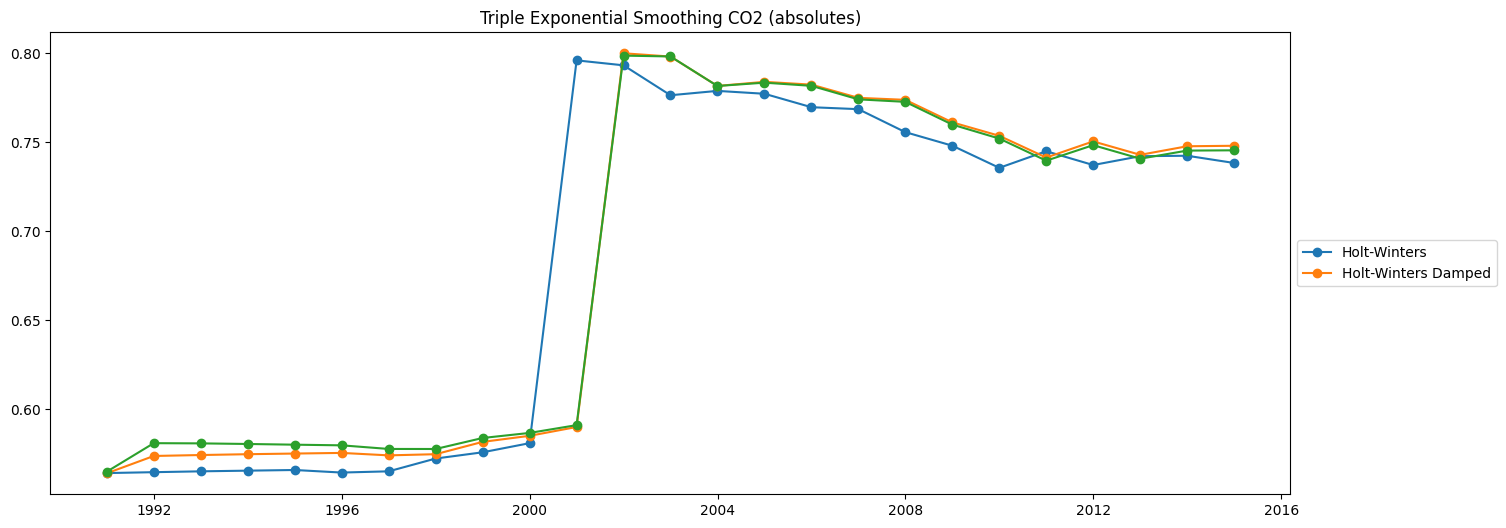

In [37]:
titles = ['Triple Exponential Smoothing CO2', 'Triple Exponential Smoothing CH4', 'Triple Exponential Smoothing N2O', 'Triple Exponential Smoothing CO2 (zeroes)', 'Triple Exponential Smoothing CO2 (absolutes)']
datasets = [co2_ts_train, ch4_ts_train, n2o_ts_train, co2_cero_ts_train, co2_abs_ts_train]
testsets = [co2_ts_test, ch4_ts_test, n2o_ts_test, co2_cero_ts_test, co2_abs_ts_test]

scores["Models"].append("Holt-Winters")
scores["Models"].append("Holt-Winters Damped Trend")

for i in range(len(datasets)):
    title = titles[i]
    dataset = datasets[i]
    testset = testsets[i]
    col = scores_cols[i]
    
    fit1 = ExponentialSmoothing(
        dataset,
        trend="add",
        use_boxcox=True,
        initialization_method="estimated",
    ).fit()
    fit2 = ExponentialSmoothing(
        dataset,
        trend="add",
        damped_trend=True,
        use_boxcox=True,
        initialization_method="estimated",
    ).fit()

    
    values = pd.DataFrame(
        index=[r"$\alpha$", r"$\beta$", r"$\phi$", r"$\gamma$", r"$l_0$", "$b_0$", "SSE"]
    )

    params = [
        "smoothing_level",
        "smoothing_trend",
        "damping_trend",
        "smoothing_seasonal",
        "initial_level",
        "initial_trend",
    ]

    values["Normal"] = [fit1.params[p] for p in params] + [fit1.sse]
    values["Damped"] = [fit2.params[p] for p in params] + [fit2.sse]

    fit_vals1 = fit1.fittedvalues
    fit_vals2 = fit2.fittedvalues

    fcast1 = fit1.forecast(5)
    fcast2 = fit2.forecast(5)

    results = [dataset, fit_vals1, fit_vals2]
    results_fc = [fcast1, fcast2]
    names = [r"Holt-Winters", r"Holt-Winters Damped"]
    plot_graphs(results, names, title)

    for result in results_fc:
        scores[col].append(time_series_eval_metrics(testset.values, result))

# Autoregresor

In [38]:
"""
titles = ['Autoregressor CO2', 'Autoregressor CH4', 'Autoregressor N2O', 'Autoregressor CO2 (zeroes)', 'Autoregressor CO2 (absolutes)']
datasets = [co2_ts_train, ch4_ts_train, n2o_ts_train, co2_cero_ts_train, co2_abs_ts_train]
testsets = [co2_ts_test, ch4_ts_test, n2o_ts_test, co2_cero_ts_test, co2_abs_ts_test]


# for i in range(10):
    # scores["Models"].append(f"Autoregressor Lags={i}")

for i in range(len(datasets)):
    title = titles[i]
    dataset = datasets[i]
    testset = testsets[i]
    col = scores_cols[i]
    
    results = [dataset]
    results_fc = []
    names = []
    
    for j in range(10):
        fit1 = AutoReg(dataset, lags=j).fit()
        fit_vals1 = fit1.fittedvalues
        fcast1 = fit1.forecast(5)
        results.append(fit_vals1)
        results_fc.append(fcast1)
        # names.append(f"AutoReg Lags={j}")
    
    # plot_graphs(results, names, title)

    # for result in results_fc:
        # scores[col].append(time_series_eval_metrics(testset.values, result))
"""


'\ntitles = [\'Autoregressor CO2\', \'Autoregressor CH4\', \'Autoregressor N2O\', \'Autoregressor CO2 (zeroes)\', \'Autoregressor CO2 (absolutes)\']\ndatasets = [co2_ts_train, ch4_ts_train, n2o_ts_train, co2_cero_ts_train, co2_abs_ts_train]\ntestsets = [co2_ts_test, ch4_ts_test, n2o_ts_test, co2_cero_ts_test, co2_abs_ts_test]\n\n\n# for i in range(10):\n    # scores["Models"].append(f"Autoregressor Lags={i}")\n\nfor i in range(len(datasets)):\n    title = titles[i]\n    dataset = datasets[i]\n    testset = testsets[i]\n    col = scores_cols[i]\n    \n    results = [dataset]\n    results_fc = []\n    names = []\n    \n    for j in range(10):\n        fit1 = AutoReg(dataset, lags=j).fit()\n        fit_vals1 = fit1.fittedvalues\n        fcast1 = fit1.forecast(5)\n        results.append(fit_vals1)\n        results_fc.append(fcast1)\n        # names.append(f"AutoReg Lags={j}")\n    \n    # plot_graphs(results, names, title)\n\n    # for result in results_fc:\n        # scores[col].append(ti

# ARIMA

In [39]:
titles = ['Autoregressor CO2', 'Autoregressor CH4', 'Autoregressor N2O', 'Autoregressor CO2 (zeroes)', 'Autoregressor CO2 (absolutes)']
datasets = [co2_ts_train, ch4_ts_train, n2o_ts_train, co2_cero_ts_train, co2_abs_ts_train]
testsets = [co2_ts_test, ch4_ts_test, n2o_ts_test, co2_cero_ts_test, co2_abs_ts_test]


for p in range(1, 10):
    scores["Models"].append(f"Autoregressive Model ({p})")
    
for q in range(1, 10):
    scores["Models"].append(f"Moving Average Model ({q})")
    
for p in range(1, 10):
        for q in range(1, 10):
            scores["Models"].append(f"Autoregressive Moving Average Model ({p},{q})")

for i in range(len(datasets)):
    title = titles[i]
    dataset = datasets[i]
    testset = testsets[i]
    col = scores_cols[i]
    
    results = [dataset]
    results_fc = []
    names = []
    
    for p in range(1, 10):
        fit1 = ARIMA(dataset, order=(p, 0, 0))
        fit1.initialize_approximate_diffuse()
        fit1 = fit1.fit()
        fit_vals1 = fit1.fittedvalues
        fcast1 = fit1.forecast(5)
        results.append(fit_vals1)
        results_fc.append(fcast1)
        names.append(f"Autoregressive Model ({p})")
        
    for q in range(1, 10):
        fit1 = ARIMA(dataset, order=(0, q, 0))
        fit1.initialize_approximate_diffuse()
        fit1 = fit1.fit()
        fit_vals1 = fit1.fittedvalues
        fcast1 = fit1.forecast(5)
        results.append(fit_vals1)
        results_fc.append(fcast1)
        names.append(f"Moving Average Model ({q})")
    
    for p in range(1, 10):
        for q in range(1, 10):
            fit1 = ARIMA(dataset, order=(p, q, 0))
            fit1.initialize_approximate_diffuse()
            fit1 = fit1.fit()
            fit_vals1 = fit1.fittedvalues
            fcast1 = fit1.forecast(5)
            results.append(fit_vals1)
            results_fc.append(fcast1)
            # names.append(f"Autoregressive Moving Average Model ({p},{q})")
    
    # plot_graphs(results, names, title)

    for result in results_fc:
        scores[col].append(time_series_eval_metrics(testset.values, result))

D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\base\model.py:6

D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\base\model.py:6

D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\Daniel\ghg-forecasting\venv\lib\site-packages\s

D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\Daniel\ghg-forecastin

D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Daniel\ghg-forecasting\venv\lib\site-packages\s

D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Daniel\ghg-forecastin

D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\Daniel\ghg-forecastin

D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\base\model.py:6

D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\base\model.py:6

D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\base\model.py:6

# SARIMAX

In [40]:
"""
titles = ['Autoregressor CO2', 'Autoregressor CH4', 'Autoregressor N2O', 'Autoregressor CO2 (zeroes)', 'Autoregressor CO2 (absolutes)']
datasets = [co2_ts_train, ch4_ts_train, n2o_ts_train, co2_cero_ts_train, co2_abs_ts_train]
testsets = [co2_ts_test, ch4_ts_test, n2o_ts_test, co2_cero_ts_test, co2_abs_ts_test]


for p in range(1, 10):
    for q in range(1, 10):
        scores["Models"].append(f"SARIMAX (p, q) -> {p, q}")

for i in range(len(datasets)):
    title = titles[i]
    dataset = datasets[i]
    testset = testsets[i]
    col = scores_cols[i]
    
    results = [dataset]
    results_fc = []
    names = []
    
    for p in range(1, 10):
        for q in range(1, 10):
            fit1 = SARIMAX(dataset, order=(p, q, 0))
            fit1.initialize_approximate_diffuse()
            fit1 = fit1.fit()
            fcast1 = fit1.forecast(5)
            results.append(fit_vals1)
            results_fc.append(fcast1)
            names.append(f"SARIMAX (p, q) -> {p, q}")
    
    plot_graphs(results, names, title)

    for result in results_fc:
        scores[col].append(time_series_eval_metrics(testset.values, result))
"""

'\ntitles = [\'Autoregressor CO2\', \'Autoregressor CH4\', \'Autoregressor N2O\', \'Autoregressor CO2 (zeroes)\', \'Autoregressor CO2 (absolutes)\']\ndatasets = [co2_ts_train, ch4_ts_train, n2o_ts_train, co2_cero_ts_train, co2_abs_ts_train]\ntestsets = [co2_ts_test, ch4_ts_test, n2o_ts_test, co2_cero_ts_test, co2_abs_ts_test]\n\n\nfor p in range(1, 10):\n    for q in range(1, 10):\n        scores["Models"].append(f"SARIMAX (p, q) -> {p, q}")\n\nfor i in range(len(datasets)):\n    title = titles[i]\n    dataset = datasets[i]\n    testset = testsets[i]\n    col = scores_cols[i]\n    \n    results = [dataset]\n    results_fc = []\n    names = []\n    \n    for p in range(1, 10):\n        for q in range(1, 10):\n            fit1 = SARIMAX(dataset, order=(p, q, 0))\n            fit1.initialize_approximate_diffuse()\n            fit1 = fit1.fit()\n            fcast1 = fit1.forecast(5)\n            results.append(fit_vals1)\n            results_fc.append(fcast1)\n            names.append(f"SA

# Modelos scikit-learn

In [41]:
"""
estimators = []
estimators.append(('Linear Regression', linear_model.LinearRegression()))
estimators.append(('Ridge Regression', linear_model.Ridge()))
estimators.append(('Elastic Net', linear_model.ElasticNet()))
estimators.append(('Lasso LARS', linear_model.LassoLars()))
estimators.append(('ARD Regression', linear_model.ARDRegression()))
estimators.append(('Tweedie Regression', linear_model.TweedieRegressor()))
estimators.append(('SGD Regression', linear_model.SGDRegressor()))
estimators.append(('Passive Aggressive Regressor', linear_model.PassiveAggressiveRegressor()))
estimators.append(('Gaussian Process', gaussian_process.GaussianProcessRegressor()))
estimators.append(('Decision Tree', tree.DecisionTreeRegressor()))
estimators.append(('Neural Network', neural_network.MLPRegressor()))
# estimators.append(('Imputer', impute.SimpleImputer()))
estimators.append(('Random Forest Regression', ensemble.RandomForestRegressor()))
estimators.append(('Ada Boost Regression', ensemble.AdaBoostRegressor()))

titles = ['Triple Exponential Smoothing CO2', 'Triple Exponential Smoothing CH4', 'Triple Exponential Smoothing N2O', 'Triple Exponential Smoothing CO2 (zeroes)', 'Triple Exponential Smoothing CO2 (absolutes)']
datasets = [co2_ts_train, ch4_ts_train, n2o_ts_train, co2_cero_ts_train, co2_abs_ts_train]
testsets = [co2_ts_test, ch4_ts_test, n2o_ts_test, co2_cero_ts_test, co2_abs_ts_test]

for name, model in estimators:
    scores["Models"].append(name)
    
    for i in range(len(datasets)):
        title = titles[i]
        dataset = datasets[i]
        testset = testsets[i]
        col = scores_cols[i]

        model.fit(dataset.values.reshape(-1, 1), [i for i in range(25)])
        pred = model.predict(testset.values.reshape(-1, 1))
        scores[col].append(time_series_eval_metrics(testset.values, pred))
"""

'\nestimators = []\nestimators.append((\'Linear Regression\', linear_model.LinearRegression()))\nestimators.append((\'Ridge Regression\', linear_model.Ridge()))\nestimators.append((\'Elastic Net\', linear_model.ElasticNet()))\nestimators.append((\'Lasso LARS\', linear_model.LassoLars()))\nestimators.append((\'ARD Regression\', linear_model.ARDRegression()))\nestimators.append((\'Tweedie Regression\', linear_model.TweedieRegressor()))\nestimators.append((\'SGD Regression\', linear_model.SGDRegressor()))\nestimators.append((\'Passive Aggressive Regressor\', linear_model.PassiveAggressiveRegressor()))\nestimators.append((\'Gaussian Process\', gaussian_process.GaussianProcessRegressor()))\nestimators.append((\'Decision Tree\', tree.DecisionTreeRegressor()))\nestimators.append((\'Neural Network\', neural_network.MLPRegressor()))\n# estimators.append((\'Imputer\', impute.SimpleImputer()))\nestimators.append((\'Random Forest Regression\', ensemble.RandomForestRegressor()))\nestimators.append(

In [42]:
scores_df = pd.DataFrame(data=scores, index=[i for i in range(len(scores["Models"]))])

In [43]:
HTML(scores_df.to_html())

,Models,CO2,CH4,N2O,CO2_zeroes,CO2_absolutes
0,Simple Exponential Smoothing (0.1),0.001470,6.750194e-05,1.161675e-05,1.656295e-05,1.030053e-03
1,Simple Exponential Smoothing (0.2),0.000259,3.866657e-05,1.170546e-05,1.220449e-05,9.426553e-05
2,Simple Exponential Smoothing (0.3),0.000255,3.671953e-05,1.301236e-05,1.284645e-05,7.963197e-05
3,Simple Exponential Smoothing (0.4),0.000280,3.670366e-05,1.474580e-05,1.411959e-05,8.681191e-05
4,Simple Exponential Smoothing (0.5),0.000299,3.680380e-05,1.593857e-05,1.495633e-05,9.302266e-05
5,Simple Exponential Smoothing (0.6),0.000310,3.669420e-05,1.631020e-05,1.533907e-05,9.713152e-05
6,Simple Exponential Smoothing (0.7),0.000317,3.669549e-05,1.594517e-05,1.550686e-05,1.006916e-04
7,Simple Exponential Smoothing (0.8),0.000325,3.734782e-05,1.502939e-05,1.561450e-05,1.046074e-04
8,Simple Exponential Smoothing (0.9),0.000334,3.896861e-05,1.378062e-05,1.574049e-05,1.091673e-04
9,Simple Exponential Smoothing Estimated,0.000343,4.136977e-05,1.628133e-05,1.580089e-05,1.143517e-04


In [44]:
scores_df[scores_df['CO2']==scores_df['CO2'].min()]

,Models,CO2,CH4,N2O,CO2_zeroes,CO2_absolutes
314,"Autoregressive Moving Average Model (5,6)",0.000144,0.160369,23.279187,0.004471,0.006636


In [45]:
scores_df[scores_df['CH4']==scores_df['CH4'].min()]

,Models,CO2,CH4,N2O,CO2_zeroes,CO2_absolutes
143,"Exponential trend (0.5, 0.9)",0.000268,0.000022,0.000025,0.000013,0.000117


In [46]:
scores_df[scores_df['N2O']==scores_df['N2O'].min()]

,Models,CO2,CH4,N2O,CO2_zeroes,CO2_absolutes
19,"Holt's linear trend (0.1, 0.4)",0.008949,0.000084,0.000011,0.000095,0.005852


In [47]:
scores_df[scores_df['CO2_zeroes']==scores_df['CO2_zeroes'].min()]

,Models,CO2,CH4,N2O,CO2_zeroes,CO2_absolutes
82,"Holt's linear trend (0.3, 0.7)",0.000208,0.000297,0.000095,0.000008,0.000125


In [48]:
scores_df[scores_df['CO2_absolutes']==scores_df['CO2_absolutes'].min()]

,Models,CO2,CH4,N2O,CO2_zeroes,CO2_absolutes
254,Holt-Winters Damped Trend,0.000182,0.000042,0.000031,0.000009,0.000053


D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


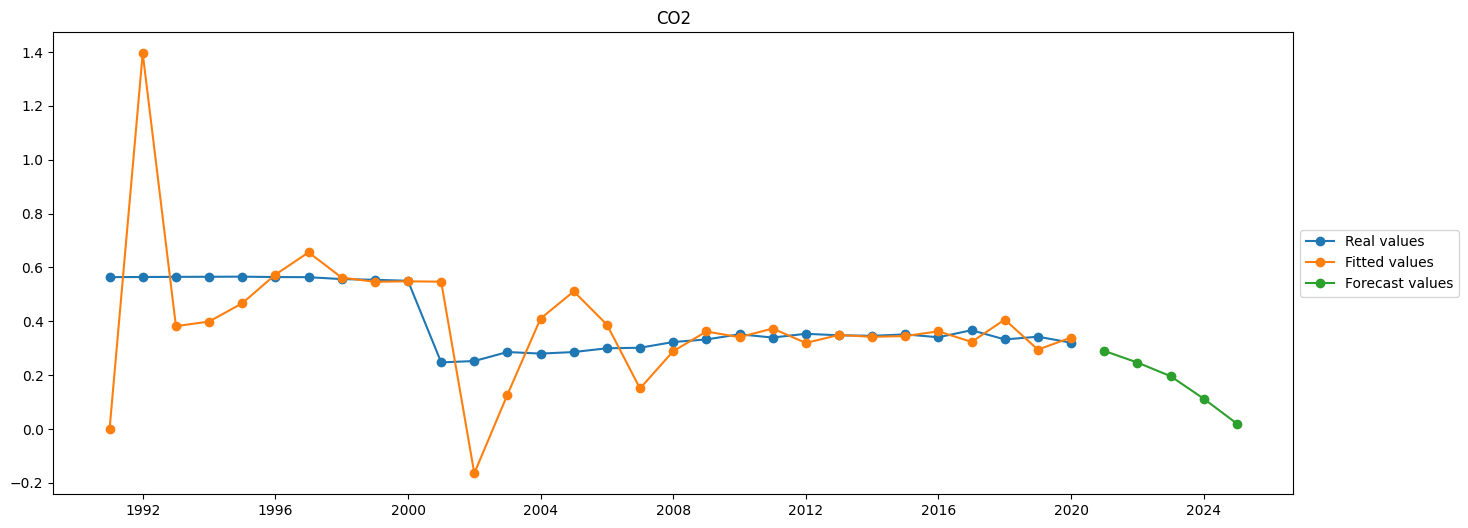

In [49]:
fit = ARIMA(co2_ts, order=(6, 4, 0))
fit.initialize_approximate_diffuse()
fit = fit.fit()
fit_vals = fit.fittedvalues
fcast = fit.forecast(5)

fig, ax = plt.subplots(1, 1, figsize=(16, 6))
ax.plot(co2_ts, marker="o")
ax.plot(fit_vals, marker="o")
ax.plot(fcast, marker="o")
ax.set_title("CO2")
ax.legend(["Real values", "Fitted values", "Forecast values"], loc='center left', bbox_to_anchor=(1, 0.5))

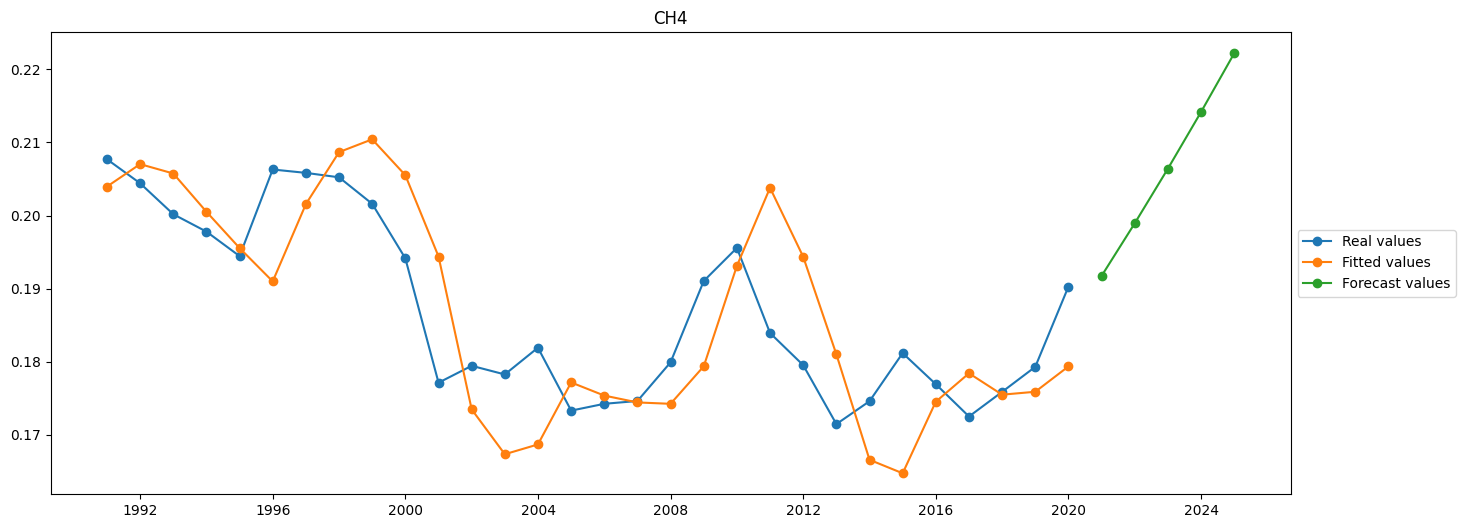

In [50]:
fit = Holt(ch4_ts, exponential=True, initialization_method="estimated")
fit = fit.fit(smoothing_level=0.5, smoothing_trend=0.9, optimized=False)
fit_vals = fit.fittedvalues
fcast = fit.forecast(5)

fig, ax = plt.subplots(1, 1, figsize=(16, 6))
ax.plot(ch4_ts, marker="o")
ax.plot(fit_vals, marker="o")
ax.plot(fcast, marker="o")
ax.set_title("CH4")
ax.legend(["Real values", "Fitted values", "Forecast values"], loc='center left', bbox_to_anchor=(1, 0.5))

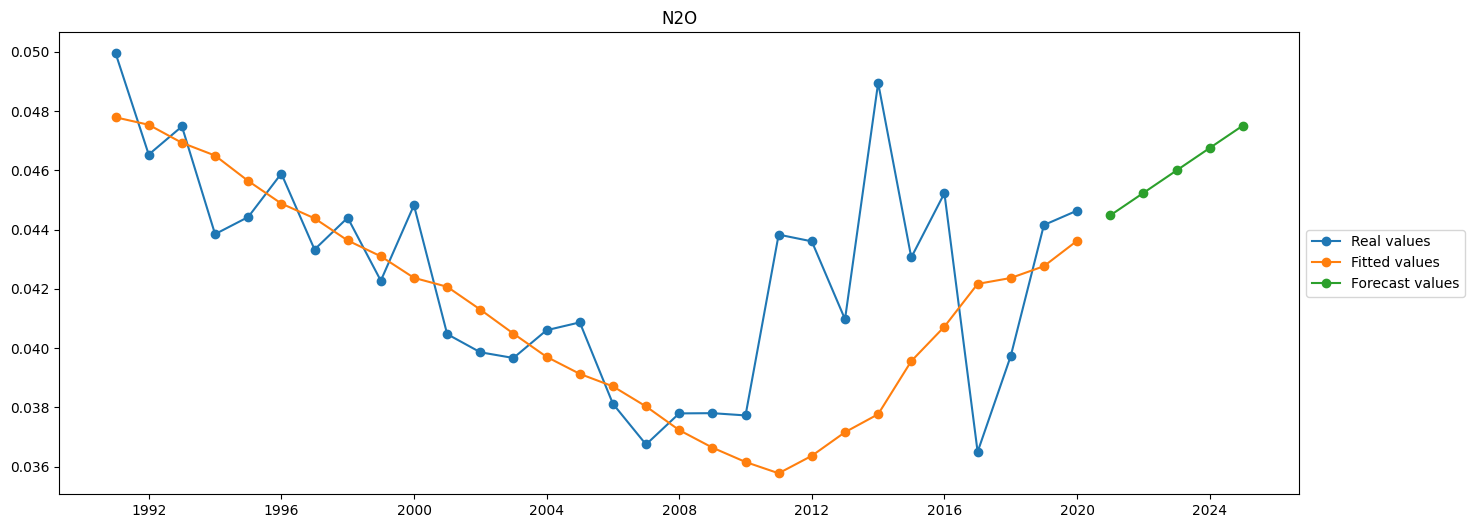

In [51]:
fit = Holt(n2o_ts, initialization_method="estimated")
fit = fit.fit(smoothing_level=0.1, smoothing_trend=0.4, optimized=False)
fit_vals = fit.fittedvalues
fcast = fit.forecast(5)

fig, ax = plt.subplots(1, 1, figsize=(16, 6))
ax.plot(n2o_ts, marker="o")
ax.plot(fit_vals, marker="o")
ax.plot(fcast, marker="o")
ax.set_title("N2O")
ax.legend(["Real values", "Fitted values", "Forecast values"], loc='center left', bbox_to_anchor=(1, 0.5))

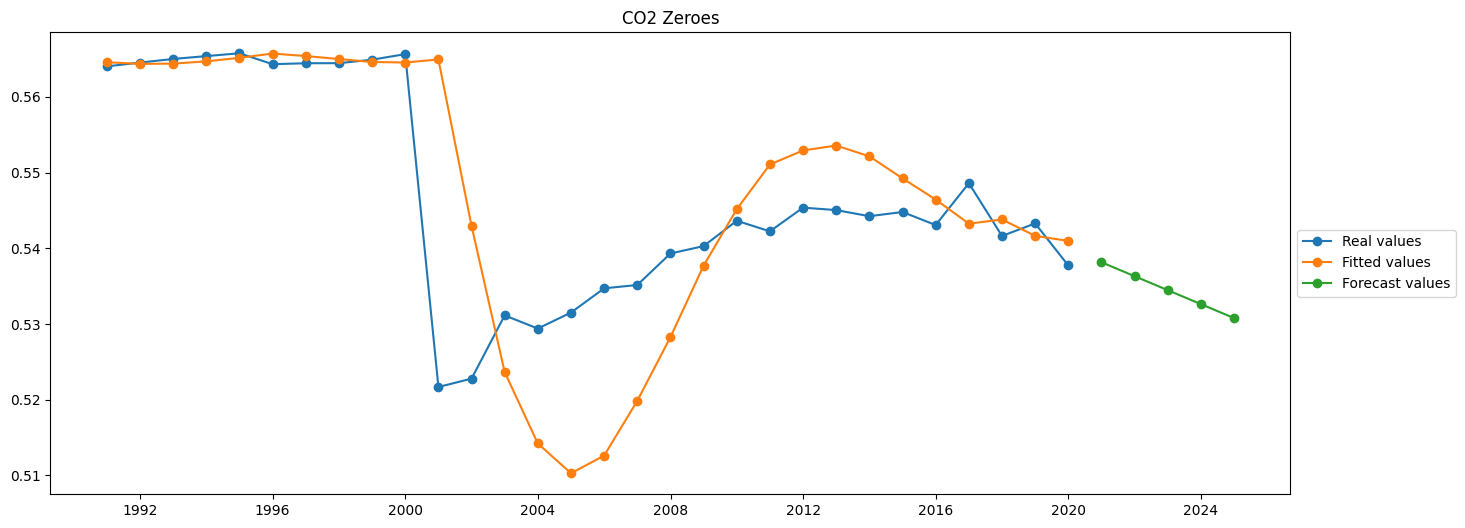

In [52]:
fit = Holt(co2_cero_ts, initialization_method="estimated")
fit = fit.fit(smoothing_level=0.3, smoothing_trend=0.7, optimized=False)
fit_vals = fit.fittedvalues
fcast = fit.forecast(5)

fig, ax = plt.subplots(1, 1, figsize=(16, 6))
ax.plot(co2_cero_ts, marker="o")
ax.plot(fit_vals, marker="o")
ax.plot(fcast, marker="o")
ax.set_title("CO2 Zeroes")
ax.legend(["Real values", "Fitted values", "Forecast values"], loc='center left', bbox_to_anchor=(1, 0.5))

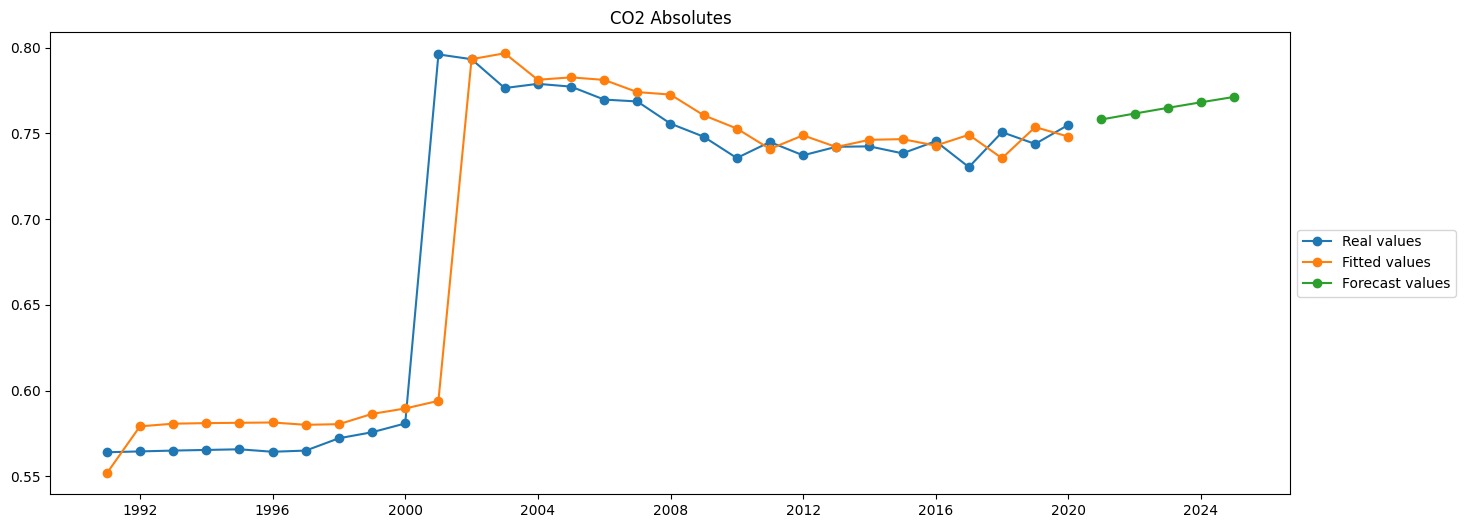

In [53]:
fit = ExponentialSmoothing(
    co2_abs_ts,
    trend="add",
    damped_trend=True,
    use_boxcox=True,
    initialization_method="estimated",)
fit = fit.fit()
fit_vals = fit.fittedvalues
fcast = fit.forecast(5)

fig, ax = plt.subplots(1, 1, figsize=(16, 6))
ax.plot(co2_abs_ts, marker="o")
ax.plot(fit_vals, marker="o")
ax.plot(fcast, marker="o")
ax.set_title("CO2 Absolutes")
ax.legend(["Real values", "Fitted values", "Forecast values"], loc='center left', bbox_to_anchor=(1, 0.5))